In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics


In [0]:
np.version.version


Out[2]: '1.20.3'

In [0]:
#reading data
rubix5_eda = pd.read_csv('/dbfs/FileStore/export_cab.csv')

# apply filters - prepared by Julie, Thank you, Julie!
"""
    The Rubix 5 dataset is already limited to:
-Policies effective 1-1-2015 and later
-CSL only
-Power units only (no trailers)
-For Hire Trucking only (no public auto, business auto or garage)

Onyshchenko, Igor Additional filters needed will be SCHEDULED_FLEET = "YES" and COMPANY <> "FREEDOM SPECIALTY"
I think this covers it.  Let me know if anyone thinks I missed anything.
"""

rubix5_eda = rubix5_eda[rubix5_eda['SCHEDULED_FLEET']=="YES"]
rubix5_eda = rubix5_eda[rubix5_eda['COMPANY'] != 'FREEDOM SPECIALTY']

# there still was 'Brokerage Trans' and 'Business Auto' for I'm filtering it
rubix5_eda = rubix5_eda[rubix5_eda['VEHICLE_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]
rubix5_eda = rubix5_eda[rubix5_eda['POLICY_SEGMENT'].isin(['Large Fleet','Mid Fleet','Non Fleet'])]

#filtering earned exposures ==0 572 cases and <0 in 13 cases
rubix5_eda = rubix5_eda[rubix5_eda['EARNED_EXPOSURES'] > 0]

#filtering POLICYSTATE != 'HI' and 'MA'
rubix5_eda = rubix5_eda[rubix5_eda['POLICYSTATE'].isin(['HI', 'MA']) == False]

# filtering CLASS_CODE != 748900 - Non-Trucking 
rubix5_eda = rubix5_eda[rubix5_eda['CLASS_CD']!=748900]


# adding a column from Julie
rubix5_eda['REGION'] = rubix5_eda['POLICYSTATE'].copy()
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'CA', 'REGION'] = 'CALIFORNIA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'FL', 'REGION'] = 'FLORIDA' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'] == 'TX', 'REGION'] = 'TEXAS' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["CT","DE","MA","MD","ME","NH","NJ","NY","PA","RI","VA","VT","WV"]), 'REGION'] = 'EAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["IA","IL","IN","KS","KY","MI","MN","MO","ND","NE","OH","OK","SD","WI"]), 'REGION'] = 'MIDWEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AL","AR","GA","LA","MS","NC","SC","TN"]), 'REGION'] = 'SOUTHEAST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AZ","CO","ID","MT","NM","NV","OR","UT","WA","WY"]), 'REGION'] = 'WEST' 
rubix5_eda.loc[rubix5_eda['POLICYSTATE'].isin(["AK","HI"]), 'REGION'] = 'OTHER' 

#resetting indexes
rubix5_eda.reset_index(drop=True, inplace = True)
# del rubix5_eda['Unnamed: 0']
rubix5_eda.head()

Out[3]:

,DOT_NUMBER,POLICYID,POLICY_EFF_DT,VEHICLE_NO,POLICY_EXP_DT,POLICYSTATUS,POLICYISSUETYPE,COMPANY,POLICYSTATE,STATE_ADMITTED,NEW_VENTURE,PKGCOMBO,YRSINBUSCT,YRSOFINSCT,POLICY_SEGMENT,OPERATION_EXPOSURE_POLICY,ZONE_GRPCD_POLICY,SCHEDULED_FLEET,VEHICLE_SEGMENT,VEHICLE_TERRITORY,VEHICLE_STATE,MODEL_YEAR,EQUIPMENT_AGE,VIN,RADIUS_GROUP,CLASS_CD,ZONE_GRPCD_VEHICLE,VEHICLE_ZIPCD,CLASS_PRIMARY,CLASS_SECONDARY,VEHICLE_TYPE,TRANSFORM_TERRITORY,TERRITORY_GRP,OPERATION_EXPOSURE_VEHICLE,EARNED_EXP_TRANS,EARNED_EXPOSURES,AVG_DRIVER_SURCHARGE,LIAB_SCHMOD,LIAB_EXPERIMOD,RERATED_PREMIUM,...,DEDUCTIBLE_LIAB_AMT,PREM_WRITTEN_TRANS,PREM_WRITTEN_EFF,PREM_EARNED_EFF,OLEP_TRANS,OLEP_EFF,COVERAGE_GROUP,INDEMNITY_PAID,INDEMNITY_INCURRED,EXPENSE_PAID,EXPENSE_INCURRED,LARGE_LOSSES_100K,LARGE_LOSSES_250K,LARGE_LOSSES_500K,LARGE_LOSSES_1M,LATE_REPORTED_CLAIMS,CLAIM_COUNT_PAID,CLAIM_COUNT_NOT_PAID,CRASH_SCORE,BASIC_ALERTS,DRIVER_INSPECTIONS,DRIVER_OUT_OF_SERVICE,DRIVER_OOS_RATIO,VEHICLE_INSPECTIONS,VEHICLE_OUT_OF_SERVICE,VEHICLE_OOS_RATIO,DRIVING_WITHOUT_CDL,DRIVING_WO_CDL_RATIO,MCS150_UNIT_COUNT,MILEAGE_POWER_UNIT_RATIO,DRIVER_POWER_UNIT_RATIO,HOT_ZONE_INsPECTIONS,HOT_ZONE_RATIO,PREVIOUS_INSURERS,LENGTH_WITH_PRIOR,CRASHES_SEASON_1,CRASHES_SEASON_2,CRASHES_SEASON_3,CRASHES_SEASON_4,REGION
0,831876,CAI0038074,2015-02-24,4,2016-02-24,Renewed,Renewal,SCOTTSDALE INDEMNITY COMPANY,TX,A,3RD YR NEW VENTURE,AUTO LIABILITY & AUTO PD ONLY,19.0,3.0,Non Fleet,OTHER,NaN,YES,Non Fleet,21,TX,2007.0,6-15,1M2AG11C97M051901,LOCAL,404520.0,NaN,77701.0,Extra Heavy Local Non-fleet,Waste Disposal - Building Wrecking Operators,Extra Heavy Non Zone Truckers,21,TX03,OTHER,0.005479,0.005479,1.000,1.0,1.0,4131.730928,...,NaN,18.0,18.0,18.0,27.07,27.07,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,8029.333333,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,TEXAS
1,Unknown,CAI0043676,2015-07-11,1,2016-07-11,Cancelled,Renewal,SCOTTSDALE INDEMNITY COMPANY,CA,A,OTHER,AUTO LIABILITY ONLY,5.0,NaN,Non Fleet,OTHER,NaN,YES,Non Fleet,6,CA,1985.0,Over 16,2XKWD29X7FM914742,LOCAL,331840.0,NaN,91505.0,Heavy Commercial Local Fleet,Contractors - Excavating,Heavy Commercial Non Zone Truckers,106,CA01,OTHER,0.000000,0.454795,1.100,1.0,1.0,2757.217012,...,1000.0,1141.0,1141.0,1141.0,2967.83,2968.82,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CALIFORNIA
2,Unknown,CAI0043717,2016-06-04,3,2017-06-04,Renewed,New,SCOTTSDALE INDEMNITY COMPANY,TX,A,OTHER,AUTO LIABILITY & AUTO PD ONLY,16.0,11.0,Non Fleet,DUMPING,NaN,YES,Non Fleet,6,TX,2005.0,6-15,1M2B209C15M030264,LOCAL,404790.0,NaN,77662.0,Extra Heavy Local Non-fleet,Dump and Transit Mix - All Other,Extra Heavy Non Zone Truckers,6,TX03,DUMPING,1.000000,1.000000,1.115,1.0,1.0,4376.535985,...,500.0,3457.0,3457.0,3457.0,3532.47,3532.47,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEXAS
3,643526,CAI0044410,2018-04-29,16,2019-04-29,Renewed,Renewal,SCOTTSDALE INDEMNITY COMPANY,KY,A,OTHER,AUTO LIABILITY & AUTO PD ONLY,48.0,NaN,Mid Fleet,WASTE DISP,NaN,YES,Mid Fleet,106,KY,2010.0,6-15,2NKHHN6X1AM267776,LOCAL,334530.0,NaN,40923.0,Heavy Commercial Local Non-fleet,Waste Disposal - Garbage,Heavy Commercial Non Zone Truckers,106,KY02,WASTE DISP,1.000000,1.000000,1.039,1.0,1.0,2157.602366,...,NaN,2051.0,2051.0,2051.0,1983.32,1983.32,CSL,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,7.0,0.0,6.0,0.0,0.0,5.0,1.0,0.2,0.0,0.0,17.0,29.411765,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,MIDWEST
4,422450,CAI0048094,2015-10-25,30,2016-10-25,Renewed,Renewal,SCOTTSDALE INDEMNITY COMPANY,IL,A,OTHER,AUTO LIABILITY ONLY,16.0,NaN,Mid Fleet,OTHER,NaN,YES,Mid Fleet,137,IL,1996.0,Over 16,4V4JBAPE3TN843398,LOCAL,344990.0,NaN,60804.0,Heavy truck-tractors Service Local Non-fleet,Not Otherwise Specified - All Other,Yard Non Zone Truckers,137,IL01,OTHER,0.947945,0.947945,1.004,1.0,1.0,3723.539820,...,2500.0,1263.0,1263.0,1263.0,1256.95,1256.99,CSL,0.0,0.0,0

In [0]:
# keep only features that can be used for modelling
# the list of features prepared by Amanpreet and checked by Jason and Tyler, Thank you guys!

selected_columns = ['POLICYID',
'POLICY_EFF_DT',
'POLICYSTATUS',
'COMPANY',
'NEW_VENTURE',
'PKGCOMBO',
'YRSINBUSCT',
'YRSOFINSCT',
'POLICYSTATE',
'POLICY_SEGMENT',
'SCHEDULED_FLEET',
'VEHICLE_SEGMENT',
'VEHICLE_STATE',
'MODEL_YEAR',
'EQUIPMENT_AGE',
'VIN',
'RADIUS_GROUP',
'ZONE_GRPCD_VEHICLE',
'VEHICLE_ZIPCD',
'VEHICLE_TYPE',
'TRANSFORM_TERRITORY',
'TERRITORY_GRP',
'OPERATION_EXPOSURE_VEHICLE',
'AVG_DRIVER_SURCHARGE',
'VEHICLE_COUNT',
'LIMIT_CSL',
'DEDUCTIBLE_LIAB_TYPE',
'DEDUCTIBLE_LIAB_AMT',
'EARNED_EXPOSURES',
'CLAIM_COUNT_PAID',
# CAB features
# 'CRASH_SCORE',
# 'BASIC_ALERTS',
# 'DRIVER_INSPECTIONS',
# 'DRIVER_OUT_OF_SERVICE',
# 'DRIVER_OOS_RATIO',
# 'VEHICLE_INSPECTIONS',
# 'VEHICLE_OUT_OF_SERVICE',
# 'VEHICLE_OOS_RATIO',
# 'DRIVING_WITHOUT_CDL',
# 'DRIVING_WO_CDL_RATIO',
# 'MCS150_UNIT_COUNT',
# 'MILEAGE_POWER_UNIT_RATIO',
# 'DRIVER_POWER_UNIT_RATIO',
# 'HOT_ZONE_INsPECTIONS',
# 'HOT_ZONE_RATIO',
# 'PREVIOUS_INSURERS',
# 'LENGTH_WITH_PRIOR',
# 'CRASHES_SEASON_1',
# 'CRASHES_SEASON_2',
# 'CRASHES_SEASON_3',
# 'CRASHES_SEASON_4',
'REGION'
]


df = rubix5_eda[selected_columns]

# initial feature engineering
df['POLICY_YEAR'] = df['POLICY_EFF_DT'].apply(lambda x: str(x)[:4]).astype('int')
df['POLICY_MONTH'] = df['POLICY_EFF_DT'].apply(lambda x: str(x)[5:7]).astype('int')

df['VIN_GRP1'] = df['VIN'].apply(lambda x: str(x)[:1])
df.loc[df['VIN_GRP1'].isin(['1','2','3','4','5'])==False, 'VIN_GRP1'] = 'OTHER'

df['VIN_GRP2'] = df['VIN'].apply(lambda x: str(x)[:2])
df.loc[df['VIN_GRP2'].isin(['3W', '2X', '3F', '5P', '2N', '2W', '3C', '5K', '2F', '1G', '3H',
                           '1N','1H','1M', '2H', '3A', '4V', '1F', '1X'])==False, 'VIN_GRP2'] = 'OTHER'

df['VIN_GRP3'] = df['VIN'].apply(lambda x: str(x)[:3])
df.loc[df['VIN_GRP3'].isin(['2HT','2XK','3HA','4V1','4V5','2FW','3FR','3WK', '3C7', '2NP', '2NK', '1GB', '1GC', '3C6', '4VG', '1GD', '5PV',
       '2WK', '2FZ', '2FU', '5KK', '5KJ', '1FT', '3AL', '1HS', '1FD', '1NK',
       '1M1', '1FV', '1M2', '1NP', '3HS', '1HT', '2HS', '3AK', '4V4', '1XK',
       '1XP', '1FU'])==False, 'VIN_GRP3'] = 'OTHER'

del df['VIN']
del df['POLICY_EFF_DT']

# MODEL AGE
df['MODEL_AGE'] = df['POLICY_YEAR'] - df['MODEL_YEAR'] + 1

# target definition
df['TARGET'] = df['CLAIM_COUNT_PAID'] / df['EARNED_EXPOSURES']
df['TARGET_BINARY'] = df['CLAIM_COUNT_PAID'].apply(lambda x: 1 if x>0 else 0)

df = df[df['POLICY_YEAR']<2022]

<command-4135060219618242>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['POLICY_YEAR'] = df['POLICY_EFF_DT'].apply(lambda x: str(x)[:4]).astype('int')
<command-4135060219618242>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['POLICY_MONTH'] = df['POLICY_EFF_DT'].apply(lambda x: str(x)[5:7]).astype('int')
<command-4135060219618242>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['VIN_GRP1'] = df['VIN'].apply(lambda x: str(x)[:1])
/databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 self._setitem_single_column(loc, value, pi)
<command-4135060219618242>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['VIN_GRP2'] = df['VIN'].apply(lambda x: str(x)[:2])
/databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 self._setitem_single_column(loc, value, pi)
<command-4135060219618242>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['VIN_GRP3'] = df['VIN'].apply(lambda x: str(x)[:3])
/databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 self._setitem_single_column(loc, value, pi)
<command-4135060219618242>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['MODEL_AGE'] = df['POLICY_YEAR'] - df['MODEL_YEAR'] + 1
<command-4135060219618242>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df['TARGET'] = df['CLAIM_COUNT_PAID'] / df['EARNED_EXPOSURES']
<command-4135060219618242>:87: SettingWithCopyWarning: 
A value is trying to 

In [0]:
# features for clastering
# POLICYSTATE, PKGCOMBO, YRSINBUSCT, VEHICLE_COUNT
#features = ['POLICYSTATE', 'PKGCOMBO', 'YRSINBUSCT', 'VEHICLE_COUNT']
features = ['POLICYID','REGION', 'PKGCOMBO', 'YRSINBUSCT', 'VEHICLE_COUNT']

# df on policy level
tmp = df.groupby('POLICYID').agg({'POLICYID': np.max,'REGION': np.max, 'PKGCOMBO': np.max, 'YRSINBUSCT': np.max, 'VEHICLE_COUNT': np.max, 'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum})

tmp.columns = ['POLICYID','REGION', 'PKGCOMBO', 'YRSINBUSCT', 'VEHICLE_COUNT', 'CLAIM_COUNT_PAID', 'EARNED_EXPOSURES']

tmp = tmp.reset_index(drop=True)
tmp

Out[5]:

,POLICYID,REGION,PKGCOMBO,YRSINBUSCT,VEHICLE_COUNT,CLAIM_COUNT_PAID,EARNED_EXPOSURES
0,CAI0035521,CALIFORNIA,AUTO LIABILITY ONLY,8.0,1.0,0,1.000000
1,CAI0035877,MIDWEST,AUTO LIABILITY & AUTO PD ONLY,4.0,1.0,0,1.000000
2,CAI0035879,MIDWEST,AUTO LIABILITY & AUTO PD ONLY,5.0,1.0,0,1.000000
3,CAI0037101,MIDWEST,AUTO LIABILITY & AUTO PD ONLY,10.0,1.0,0,1.000000
4,CAI0037151,MIDWEST,AUTO LIABILITY & AUTO PD ONLY,32.0,4.0,0,2.482192
...,...,...,...,...,...,...,...
61359,TFO0000074,WEST,AUTO LIABILITY ONLY,10.0,12.0,0,4.339726
61360,TFO0000075,WEST,"AUTO LIAB, AUTO PD & GEN LIAB",7.0,15.0,0,4.778082
61361,TFS0000002,MIDWEST,AUTO LIABILITY & GENERAL LIAB,23.0,17.0,2,12.632877
61362,TFS0000008,EAST,AUTO LIABILITY ONLY,5.0,15.0,0,7.726027


In [0]:
# categories to dummy
tmp[features].isnull().sum()

tmp[features] = tmp[features].fillna(-1)
cluster_df = tmp[features]

cluster_df = pd.get_dummies(cluster_df, columns = ['REGION', 'PKGCOMBO'])

cluster_df = cluster_df.reset_index(drop = True)
cluster_df

# normalazing VEHICLE_COUNT and YRSINBUSCT
from sklearn.preprocessing import normalize

cluster_df[['YRSINBUSCT','VEHICLE_COUNT']] = normalize(cluster_df[['YRSINBUSCT','VEHICLE_COUNT']], norm='max')

cluster_df

del cluster_df['POLICYID']

In [0]:
import hdbscan

In [0]:
import umap

In [0]:
cluster_df.shape

Out[9]: (61364, 21)

In [0]:
cluster = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=500)
cluster.fit_predict(cluster_df)

Out[10]: array([ 7, 13, 13, ..., -1, 2, -1])

In [0]:
#With default HDBScan parameters we got 2086 clusters.
#With above parameters we got 34 clusters.
cluster.labels_.max()

Out[11]: 34

In [0]:
labels = cluster.labels_

In [0]:
labels.min()

Out[13]: -1

In [0]:
tmp['CLUSTER_ID'] = labels

In [0]:
tmp.shape

Out[15]: (61364, 8)

In [0]:
tmp.head(2)

Out[16]:

,POLICYID,REGION,PKGCOMBO,YRSINBUSCT,VEHICLE_COUNT,CLAIM_COUNT_PAID,EARNED_EXPOSURES,CLUSTER_ID
0,CAI0035521,CALIFORNIA,AUTO LIABILITY ONLY,8.0,1.0,0,1.0,7
1,CAI0035877,MIDWEST,AUTO LIABILITY & AUTO PD ONLY,4.0,1.0,0,1.0,13


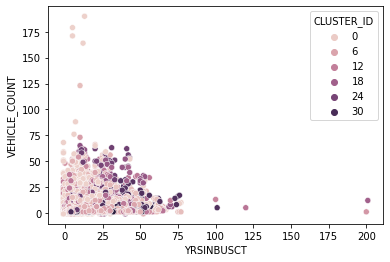

In [0]:
sns.scatterplot(x=tmp['YRSINBUSCT'], y=tmp['VEHICLE_COUNT'],data=tmp,hue=tmp['CLUSTER_ID'])
plt.show()

In [0]:
#Applying T-SNE
from sklearn.manifold import TSNE

tsne_features = TSNE().fit_transform(cluster_df)



In [0]:
#cluster_tsne = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=625)
cluster_tsne = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=625,cluster_selection_epsilon=4.0)
#cluster_tsne = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=625)
cluster_tsne.fit_predict(tsne_features)

Out[19]: array([10, 12, 12, ..., 12, 3, -1])

In [0]:
print(cluster_tsne.labels_.max())
print(len(cluster_tsne.labels_))
print(cluster_tsne.labels_.min())
labels_tsne = cluster_tsne.labels_

13
61364
-1

45883
15481
61364

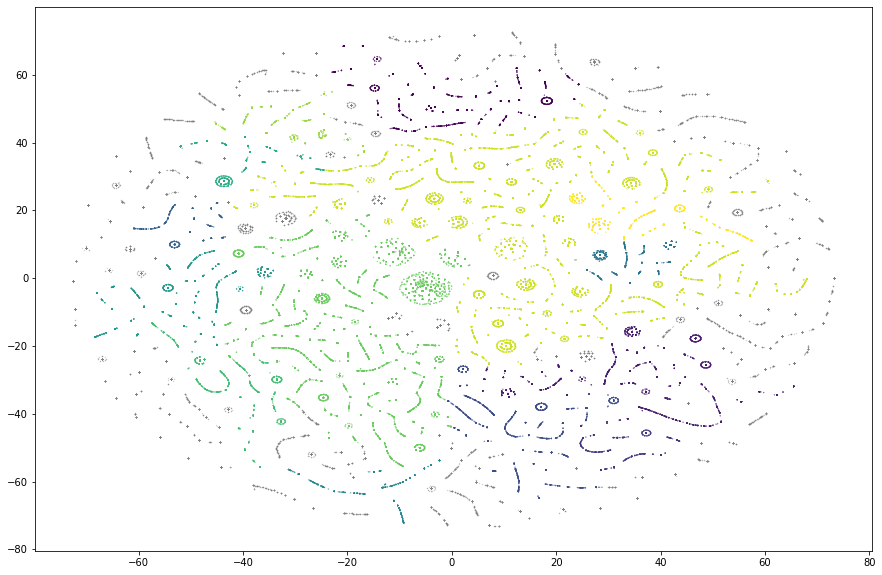

In [0]:
clustered = (labels_tsne >= 0)
print(len(tsne_features[clustered]))
print(len(tsne_features[~clustered]))
print(len(clustered))
plt.figure(figsize=(15,10))
plt.scatter(tsne_features[~clustered, 0],
            tsne_features[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(tsne_features[clustered, 0],
            tsne_features[clustered, 1],
            c=labels_tsne[clustered],
            s=0.1,
            #cmap='Spectral'
           );

In [0]:
tmp['CLUSTER_ID'] = labels_tsne
t = tmp.groupby('CLUSTER_ID').agg({'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum, 'POLICYID': np.size, 'VEHICLE_COUNT': np.mean, 'YRSINBUSCT': np.mean})
t['CLAIMS_RATE'] = t['CLAIM_COUNT_PAID']/t['POLICYID']
t['CLAIMS_EXPOSURES'] = t['CLAIM_COUNT_PAID']/t['EARNED_EXPOSURES']
t

Out[22]:

,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICYID,VEHICLE_COUNT,YRSINBUSCT,CLAIMS_RATE,CLAIMS_EXPOSURES
CLUSTER_ID,,,,,,,
-1,2700,33837.051035,15481,2.910342,9.164976,0.174407,0.079794
0,528,6155.177521,2587,3.522227,7.957480,0.204097,0.085781
1,380,5417.966116,3414,1.969537,12.487991,0.111306,0.070137
2,237,2534.829679,745,4.810738,6.801342,0.318121,0.093497
3,677,8700.665917,2657,4.467068,8.598043,0.254799,0.077810
4,156,2049.563202,757,3.495376,9.141347,0.206077,0.076114
5,227,3036.269037,1126,3.692718,6.700710,0.201599,0.074763
6,155,1779.957413,705,3.706383,12.503546,0.219858,0.087081
7,478,5039.112107,2134,3.367385,7.860825,0.223993,0.094858


In [0]:
t = tmp.groupby('CLUSTER_ID').agg({'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum, 'POLICYID': np.size})
t['CLAIMS_RATE'] = t['CLAIM_COUNT_PAID']/t['POLICYID']
t['CLAIMS_EXPOSURES'] = t['CLAIM_COUNT_PAID']/t['EARNED_EXPOSURES']
t

Out[23]:

,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICYID,CLAIMS_RATE,CLAIMS_EXPOSURES
CLUSTER_ID,,,,,
-1,2700,33837.051035,15481,0.174407,0.079794
0,528,6155.177521,2587,0.204097,0.085781
1,380,5417.966116,3414,0.111306,0.070137
2,237,2534.829679,745,0.318121,0.093497
3,677,8700.665917,2657,0.254799,0.077810
4,156,2049.563202,757,0.206077,0.076114
5,227,3036.269037,1126,0.201599,0.074763
6,155,1779.957413,705,0.219858,0.087081
7,478,5039.112107,2134,0.223993,0.094858


In [0]:
#UMAP Clustering.

clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(cluster_df)

/databricks/python/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
 warn(

In [0]:
cluster_umap = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=625,cluster_selection_epsilon=2.0)
#cluster_umap = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=625)
cluster_umap.fit_predict(clusterable_embedding)

Out[25]: array([10, 9, -1, ..., 10, 10, 10])

In [0]:
print(cluster_umap.labels_.max())
print(len(cluster_umap.labels_))
print(cluster_umap.labels_.min())
labels_umap = cluster_umap.labels_

10
61364
-1

48943
12421
61364

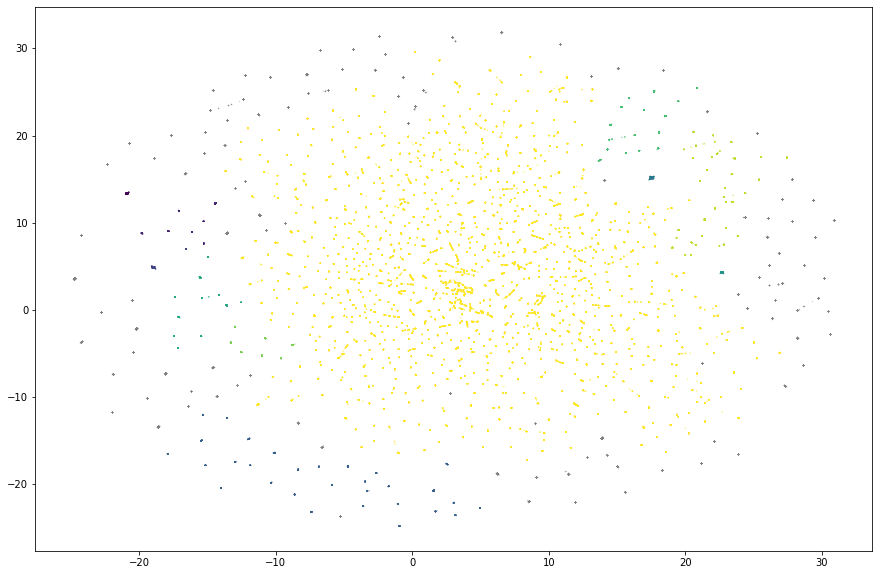

In [0]:
clustered_umap = (labels_umap >= 0)
print(len(clusterable_embedding[clustered_umap]))
print(len(clusterable_embedding[~clustered_umap]))
print(len(clustered_umap))
plt.figure(figsize=(15,10))
plt.scatter(clusterable_embedding[~clustered_umap, 0],
            clusterable_embedding[~clustered_umap, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered_umap, 0],
            clusterable_embedding[clustered_umap, 1],
            c=labels_umap[clustered_umap],
            s=0.1,
            #cmap='Spectral'
           );

In [0]:
tmp['CLUSTER_ID'] = labels_umap
t = tmp.groupby('CLUSTER_ID').agg({'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum, 'POLICYID': np.size, 'VEHICLE_COUNT': np.mean, 'YRSINBUSCT': np.mean})
t['CLAIMS_RATE'] = t['CLAIM_COUNT_PAID']/t['POLICYID']
t['CLAIMS_EXPOSURES'] = t['CLAIM_COUNT_PAID']/t['EARNED_EXPOSURES']
t

Out[28]:

,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICYID,VEHICLE_COUNT,YRSINBUSCT,CLAIMS_RATE,CLAIMS_EXPOSURES
CLUSTER_ID,,,,,,,
-1,1633,19496.375241,12421,1.961356,6.574350,0.131471,0.083759
0,73,880.645990,741,1.248313,6.241565,0.098516,0.082894
1,84,874.844303,772,1.314767,9.082902,0.108808,0.096017
2,93,1080.054819,912,1.448465,3.978070,0.101974,0.086107
3,319,3789.312318,2508,1.975678,7.673046,0.127193,0.084184
4,125,1198.425363,1095,1.182648,4.730594,0.114155,0.104304
5,98,1013.469260,670,1.841791,3.685075,0.146269,0.096698
6,121,1576.145566,1128,1.696809,9.327128,0.107270,0.076770
7,179,2711.857964,1074,3.547486,4.996276,0.166667,0.066006


In [0]:
t = tmp.groupby('CLUSTER_ID').agg({'CLAIM_COUNT_PAID': np.sum, 'EARNED_EXPOSURES': np.sum, 'POLICYID': np.size})
t['CLAIMS_RATE'] = t['CLAIM_COUNT_PAID']/t['POLICYID']
t['CLAIMS_EXPOSURES'] = t['CLAIM_COUNT_PAID']/t['EARNED_EXPOSURES']
t

Out[29]:

,CLAIM_COUNT_PAID,EARNED_EXPOSURES,POLICYID,CLAIMS_RATE,CLAIMS_EXPOSURES
CLUSTER_ID,,,,,
-1,1633,19496.375241,12421,0.131471,0.083759
0,73,880.645990,741,0.098516,0.082894
1,84,874.844303,772,0.108808,0.096017
2,93,1080.054819,912,0.101974,0.086107
3,319,3789.312318,2508,0.127193,0.084184
4,125,1198.425363,1095,0.114155,0.104304
5,98,1013.469260,670,0.146269,0.096698
6,121,1576.145566,1128,0.107270,0.076770
7,179,2711.857964,1074,0.166667,0.066006
